In [1]:
import zipfile

In [2]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [3]:

# Get 10% of the data of the 10 classes
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# Unzip the downloaded file

zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

--2024-01-21 16:53:01--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.234.207, 142.251.171.207, 142.251.172.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.234.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   186MB/s    in 0.9s    

2024-01-21 16:53:02 (186 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [4]:
import os
for dirpath , dirname , filename in os.walk("10_food_classes_10_percent"):
  # print(f"There are {len(dirname)} directories and {len(filename)} images in '{dirpath}'.")
  print(f"There are {len(dirname)} directories and {len(filename)} Images in {dirpath}")

There are 2 directories and 0 Images in 10_food_classes_10_percent
There are 10 directories and 0 Images in 10_food_classes_10_percent/train
There are 0 directories and 75 Images in 10_food_classes_10_percent/train/pizza
There are 0 directories and 75 Images in 10_food_classes_10_percent/train/ice_cream
There are 0 directories and 75 Images in 10_food_classes_10_percent/train/ramen
There are 0 directories and 75 Images in 10_food_classes_10_percent/train/grilled_salmon
There are 0 directories and 75 Images in 10_food_classes_10_percent/train/chicken_wings
There are 0 directories and 75 Images in 10_food_classes_10_percent/train/fried_rice
There are 0 directories and 75 Images in 10_food_classes_10_percent/train/hamburger
There are 0 directories and 75 Images in 10_food_classes_10_percent/train/chicken_curry
There are 0 directories and 75 Images in 10_food_classes_10_percent/train/steak
There are 0 directories and 75 Images in 10_food_classes_10_percent/train/sushi
There are 10 director

In [5]:
train_dir = '10_food_classes_10_percent/train/'
test_dir = '10_food_classes_10_percent/test/'

In [6]:
from tensorflow.keras.utils import image_dataset_from_directory

In [7]:
train_data = image_dataset_from_directory(train_dir,
                                          batch_size = 32,
                                          image_size = (224,224),
                                          label_mode = 'categorical',
                                          shuffle = False)

test_data = image_dataset_from_directory(test_dir,
                                         batch_size = 32,
                                         image_size = (224,224),
                                         label_mode = 'categorical',
                                         shuffle = False)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
list(train_data)

In [48]:
dataset = tf.data.Dataset.range(10)
for i in dataset.batch(3,drop_remainder=True):
  print(i)


tf.Tensor([0 1 2], shape=(3,), dtype=int64)
tf.Tensor([3 4 5], shape=(3,), dtype=int64)
tf.Tensor([6 7 8], shape=(3,), dtype=int64)


In [ ]:
train_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [18]:
for images , labels in train_data.take(1):
  print(len(images))

# so what this take function does is it unravels a batch

32


In [ ]:
for images , labels in train_data.take(1):
  print(images , labels)

# Creating our first model using Functional API

In [67]:
import datetime
def get_tensorboard_callback(dirname , experiment_name):

  log_dir = dirname + "/" + experiment_name + "/" + datetime.datetime.now().strftime('%Y %m %d %H %M %S')

  tensorboard = tf.keras.callbacks.TensorBoard(log_dir = log_dir)

  return tensorboard

In [68]:
# 1. Create base model with tf.keras.applications
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False) # not going to include top layer as we are going to add our own dense layer

# 2. Feeze the base model (so the underlying pre-trained patterns aren't updated during training)
base_model.trainable = False

# 3. create inputs into our model
inputs = tf.keras.layers.Input(shape=(224,224,3), name = "input_layer")

# 4. if using a model like resnet normalising is required (Efficient models have built-in rescaling)
# x = tf.keras.layers.experimental.preprocessing.rescaling(1.0 / 255.0)(inputs)

# 5. pass the input to the base model
x = base_model(inputs)
print(f"Shape after passing inputs through the base model {x.shape}")

# 6. average pool the outputs of the base model (aggregate all the most important)
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
print(f"Shape after AveragePooling2D {x.shape}")

# 7. create the output activation layer
outputs = tf.keras.layers.Dense(10, activation = "softmax", name = "output_layer")(x)

# 8. combine the inputs with the outputs in a model
model_0 = tf.keras.Model(inputs, outputs)

# 9. compile the model
model_0.compile(loss = "categorical_crossentropy",
                optimizer = "Adam",
                metrics = ["accuracy"])

# 10. Fit the model
model_0_history = model_0.fit(train_data,
                              epochs = 5,
                              steps_per_epoch = len(train_data),
                              validation_data = test_data,
                              validation_steps = int(0.25 * len(test_data)),
                              callbacks = [get_tensorboard_callback("tensorboard", "Efficient_name")])


24274472/24274472 [==============================] - 0s 0us/step
Shape after passing inputs through the base model (None, 7, 7, 1280)
Shape after AveragePooling2D (None, 1280)
Epoch 1/5
24/24 [==============================] - 100s 4s/step - loss: 3.0665 - accuracy: 0.0627 - val_loss: 1.3388 - val_accuracy: 0.7105
Epoch 2/5
24/24 [==============================] - 88s 4s/step - loss: 1.9117 - accuracy: 0.3533 - val_loss: 1.4365 - val_accuracy: 0.6579
Epoch 3/5
24/24 [==============================] - 86s 4s/step - loss: 1.4830 - accuracy: 0.6147 - val_loss: 1.3940 - val_accuracy: 0.6020
Epoch 4/5
24/24 [==============================] - 80s 3s/step - loss: 1.2518 - accuracy: 0.6880 - val_loss: 1.2573 - val_accuracy: 0.6332
Epoch 5/5
24/24 [==============================] - 88s 4s/step - loss: 1.0768 - accuracy: 0.7400 - val_loss: 1.1448 - val_accuracy: 0.6497


In [69]:
len(train_data)

24

In [ ]:
# # 1. Create base model with tf.keras.applications
# base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

# # OLD
# # base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# # 2. Freeze the base model (so the pre-learned patterns remain)
# base_model.trainable = False

# # 3. Create inputs into the base model
# inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

# # 4. If using ResNet50V2, add this to speed up convergence, remove for EfficientNetV2
# # x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# # 5. Pass the inputs to the base_model (note: using tf.keras.applications, EfficientNetV2 inputs don't have to be normalized)
# x = base_model(inputs)
# # Check data shape after passing it to base_model
# print(f"Shape after base_model: {x.shape}")

# # 6. Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
# x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
# print(f"After GlobalAveragePooling2D(): {x.shape}")

# # 7. Create the output activation layer
# outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

# # 8. Combine the inputs with the outputs into a model
# model_0 = tf.keras.Model(inputs, outputs)

# # 9. Compile the model
# model_0.compile(loss='categorical_crossentropy',
#               optimizer=tf.keras.optimizers.Adam(),
#               metrics=["accuracy"])

# # 10. Fit the model (we use less steps for validation so it's faster)
# history_10_percent = model_0.fit(train_data,
#                                  epochs=5,
#                                  steps_per_epoch=len(train_data),
#                                  validation_data=test_data,
#                                  # Go through less of the validation data so epochs are faster (we want faster experiments!)
#                                  validation_steps=int(0.25 * len(test_data)),
#                                  # Track our model's training logs for visualization later
#                                  callbacks=[get_tensorboard_callback("transfer_learning", "10_percent_feature_extract")])

In [ ]:
# model_0.evaluate(test_data)

79/79 [==============================] - 134s 2s/step - loss: 0.5712 - accuracy: 0.8688


[0.5712397694587708, 0.8687999844551086]

In [ ]:
for layer_number , layer in enumerate(base_model.layers):
  print(layer_number , layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv
4 stem_bn
5 stem_activation
6 block1a_project_conv
7 block1a_project_bn
8 block1a_project_activation
9 block2a_expand_conv
10 block2a_expand_bn
11 block2a_expand_activation
12 block2a_project_conv
13 block2a_project_bn
14 block2b_expand_conv
15 block2b_expand_bn
16 block2b_expand_activation
17 block2b_project_conv
18 block2b_project_bn
19 block2b_drop
20 block2b_add
21 block3a_expand_conv
22 block3a_expand_bn
23 block3a_expand_activation
24 block3a_project_conv
25 block3a_project_bn
26 block3b_expand_conv
27 block3b_expand_bn
28 block3b_expand_activation
29 block3b_project_conv
30 block3b_project_bn
31 block3b_drop
32 block3b_add
33 block4a_expand_conv
34 block4a_expand_bn
35 block4a_expand_activation
36 block4a_dwconv2
37 block4a_bn
38 block4a_activation
39 block4a_se_squeeze
40 block4a_se_reshape
41 block4a_se_reduce
42 block4a_se_expand
43 block4a_se_excite
44 block4a_project_conv
45 block4a_project_bn
46 block4b_expand_conv
47 block

In [ ]:
base_model.summary()

In [ ]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 5932122 (22.63 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 5919312 (22.58 MB)
__________________

In [ ]:
tf.random.set_seed(99)
input_tensor = tf.random.normal((1,2,2,3))
input_tensor

<tf.Tensor: shape=(1, 2, 2, 3), dtype=float32, numpy=
array([[[[-0.39410433, -0.43982184,  0.51258147],
         [ 0.21715854, -0.55385107,  2.5249932 ]],

        [[-1.0023146 ,  0.18335801, -1.6214063 ],
         [ 0.6256286 , -0.07952555, -1.7481256 ]]]], dtype=float32)>

In [ ]:
tf.keras.layers.GlobalAveragePooling2D()(input_tensor)

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.13840795, -0.2224601 , -0.08298928]], dtype=float32)>

In [ ]:
# so we have a tensor of dimensions (none , 7, 7, 1280) None could be one
# Globalaveragepooling2D converts tensor into vector

In [ ]:
# Lets replicate the GlobalAveragePool2D
print(tf.reduce_mean(input_tensor, axis = [1,2]))
"""python starts from zero, so what this does this is it will take the axis 1 and axis 2 and get the mean of it """

tf.Tensor([[-0.13840795 -0.2224601  -0.08298928]], shape=(1, 3), dtype=float32)


'python starts from zero, so what this does this is it will take the axis 1 and axis 2 and get the mean of it '

In [ ]:
input_tensor_1 = tf.random.normal((1,7,7,1280))
GAP2D = tf.keras.layers.GlobalAveragePooling2D()(input_tensor_1)
print(GAP2D.shape)
GAP2D

(1, 1280)


<tf.Tensor: shape=(1, 1280), dtype=float32, numpy=
array([[ 0.01319724, -0.20209609,  0.03699584, ..., -0.00179215,
         0.0167683 , -0.0477644 ]], dtype=float32)>

In [ ]:
tf.keras.layers.GlobalMaxPooling2D()(input_tensor)

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.6256286 , 0.18335801, 2.5249932 ]], dtype=float32)>

In [ ]:
# Running a series of Transfer learning experiments


Model_1 with 1% of training data

In [ ]:
# Download and unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

# Unzip the downloaded data
zip_ref = zipfile.ZipFile("10_food_classes_1_percent.zip")
zip_ref.extractall()
zip_ref.close()

--2024-01-20 04:17:57--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.145.207, 74.125.128.207, 74.125.143.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.145.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  18.1MB/s    in 7.8s    

2024-01-20 04:18:05 (16.3 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
def view_data(file):
  """Provide the filename"""
  for dirpath , dirname , filename in os.walk(file):
    print(f"There are {len(dirname)} directories and {len(filename)} Images in {dirpath} ")


In [ ]:
view_data("10_food_classes_1_percent")

There are 2 directories and 0 Images in 10_food_classes_1_percent 
There are 10 directories and 0 Images in 10_food_classes_1_percent/train 
There are 0 directories and 7 Images in 10_food_classes_1_percent/train/pizza 
There are 0 directories and 7 Images in 10_food_classes_1_percent/train/ice_cream 
There are 0 directories and 7 Images in 10_food_classes_1_percent/train/ramen 
There are 0 directories and 7 Images in 10_food_classes_1_percent/train/grilled_salmon 
There are 0 directories and 7 Images in 10_food_classes_1_percent/train/chicken_wings 
There are 0 directories and 7 Images in 10_food_classes_1_percent/train/fried_rice 
There are 0 directories and 7 Images in 10_food_classes_1_percent/train/hamburger 
There are 0 directories and 7 Images in 10_food_classes_1_percent/train/chicken_curry 
There are 0 directories and 7 Images in 10_food_classes_1_percent/train/steak 
There are 0 directories and 7 Images in 10_food_classes_1_percent/train/sushi 
There are 10 directories and 0 

In [ ]:
train_dir_one_percent = "10_food_classes_1_percent/train/"
test_dir_one_percent = "10_food_classes_1_percent/test/"

In [ ]:
# Preprocess the data
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
train_data_one_percent = image_dataset_from_directory(train_dir_one_percent,
                                                      batch_size = 32,
                                                      image_size = (224,224),
                                                      label_mode = 'categorical')

test_data_one_percent = image_dataset_from_directory(test_dir_one_percent,
                                                     batch_size = 32 ,
                                                     image_size = (224,224),
                                                     label_mode = 'categorical')

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


Data Augmentation within Model

### DataAugmentaion right into a model
* Preprocessing of the images (augmenting them) happens on the GPU rather than on the CPU (much faster).
* Images are best preprocessed on the GPU where as text and structured data are more suited to be preprocessed on the CPU.
* Image data augmentation only happens during training so we can still export our whole model and use it elsewhere. And if someone else wanted to train the same model as us, including the same kind of data augmentation, they could.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
  # layers.Rescaling(1/255.)
], name = "data_augmentaion")

In [ ]:
train_data_one_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

(-0.5, 421.5, 515.5, -0.5)

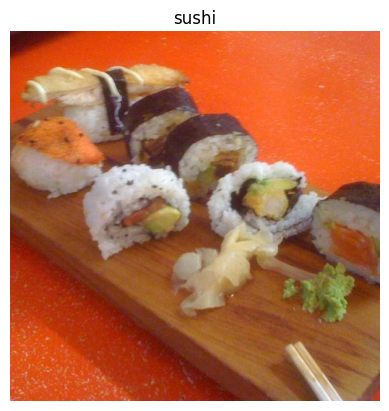

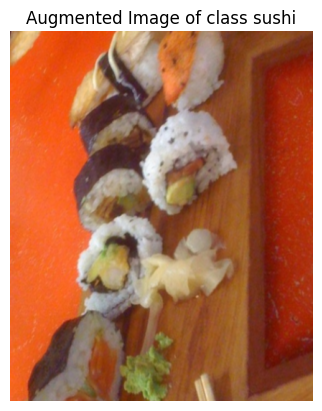

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path = "10_food_classes_1_percent/train/"
class_name = random.choice(train_data_one_percent.class_names)
target_dir = path + class_name
list_of_images = os.listdir(target_dir)
random_image = random.choice(list_of_images)
image = mpimg.imread(target_dir + "/" + random_image)
plt.imshow(image)
plt.title(class_name)
plt.axis("off")

# Lets plot a augmented image
augment_image = data_augmentation(tf.expand_dims(image, axis=0))
plt.figure()
plt.imshow(tf.squeeze(augment_image)/255.0)
plt.title(f"Augmented Image of class {class_name}")
plt.axis("off")

Run the cell above a few times and you can see the different random augmentations on different classes of images. Because we're going to add the data augmentation model as a layer in our upcoming transfer learning model, it'll apply these kind of random augmentations to each of the training images which passes through it.

***Doing this will make our training dataset a little more varied. You can think of it as if you were taking a photo of food in real-life, not all of the images are going to be perfect, some of them are going to be orientated in strange ways. These are the kind of images we want our model to be able to handle.***

Speaking of model, let's build one with the Functional API. We'll run through all of the same steps as before except for one difference, we'll add our data augmentation Sequential model as a layer immediately after the input layer.

In [ ]:
# Feature extraction transfer learning on 1% of data with data augmentation

# 1. create a base model
base_model_1 = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top = False)

# 2. freeze model layers
base_model_1.trainable = False

# create inputs
inputs = tf.keras.layers.Input(shape = (224,224,3), name = "Input_layer")

# using augmented data a
x = data_augmentation(inputs)

# Normalisation not needed

x = base_model_1(x, training=False)

x = tf.keras.layers.GlobalAveragePooling2D(name = "GAP2D")(x)

outputs = tf.keras.layers.Dense(10 , activation = "softmax", name = "output_layer")(x)

model_1 = tf.keras.Model(inputs, outputs)

model_1.compile(loss = "categorical_crossentropy", optimizer = "Adam", metrics = ["accuracy"])

# Fit the model

model_1_history = model_1.fit(train_data_one_percent,
                              epochs = 5,
                              steps_per_epoch = len(train_data_one_percent),
                              validation_data = test_data_one_percent,
                              validation_steps = len(test_data_one_percent),
                              callbacks = get_tensorboard_callback("tensorboard_1", "Model_1"))

Epoch 1/5
3/3 [==============================] - 220s 104s/step - loss: 2.4442 - accuracy: 0.0857 - val_loss: 2.2428 - val_accuracy: 0.1548
Epoch 2/5
3/3 [==============================] - 149s 73s/step - loss: 2.1883 - accuracy: 0.2857 - val_loss: 2.1128 - val_accuracy: 0.2724
Epoch 3/5
3/3 [==============================] - 206s 102s/step - loss: 2.0285 - accuracy: 0.3714 - val_loss: 2.0052 - val_accuracy: 0.3608
Epoch 4/5
3/3 [==============================] - ETA: 0s - loss: 1.8550 - accuracy: 0.5143

KeyboardInterrupt: 

In [ ]:
model_1.evaluate(test_data_one_percent)

In [ ]:
# Get 10% of the data of the 10 classes (uncomment if you haven't gotten "10_food_classes_10_percent.zip" already)
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

--2024-01-20 04:36:28--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.218.207, 142.251.31.207, 142.251.18.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.218.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M  41.7MB/s    in 4.5s    

2024-01-20 04:36:33 (36.1 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [ ]:
train_dir_10_p = "10_food_classes_10_percent/train/"
test_dir_10_p = "10_food_classes_10_percent/test/"

In [ ]:
view_data("10_food_classes_10_percent")

There are 2 directories and 0 Images in 10_food_classes_10_percent 
There are 10 directories and 0 Images in 10_food_classes_10_percent/train 
There are 0 directories and 75 Images in 10_food_classes_10_percent/train/pizza 
There are 0 directories and 75 Images in 10_food_classes_10_percent/train/ice_cream 
There are 0 directories and 75 Images in 10_food_classes_10_percent/train/ramen 
There are 0 directories and 75 Images in 10_food_classes_10_percent/train/grilled_salmon 
There are 0 directories and 75 Images in 10_food_classes_10_percent/train/chicken_wings 
There are 0 directories and 75 Images in 10_food_classes_10_percent/train/fried_rice 
There are 0 directories and 75 Images in 10_food_classes_10_percent/train/hamburger 
There are 0 directories and 75 Images in 10_food_classes_10_percent/train/chicken_curry 
There are 0 directories and 75 Images in 10_food_classes_10_percent/train/steak 
There are 0 directories and 75 Images in 10_food_classes_10_percent/train/sushi 
There are

In [ ]:
train_data_10_p = image_dataset_from_directory(train_dir_10_p,
                                                batch_size = 32,
                                                image_size = (224,224),
                                                label_mode = 'categorical')

test_data_10_p = image_dataset_from_directory(test_dir_10_p,
                                              batch_size = 32,
                                              image_size = (224,224),
                                              label_mode = 'categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
data_augmentation_10 = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomWidth(0.2),
  tf.keras.layers.RandomHeight(0.2),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2)
])

In [ ]:
train_data_10_p.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

(-0.5, 593.5, 418.5, -0.5)

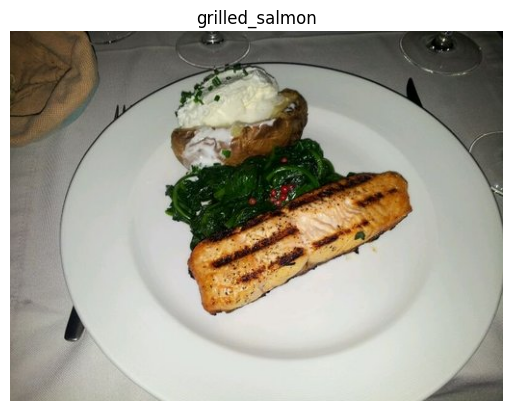

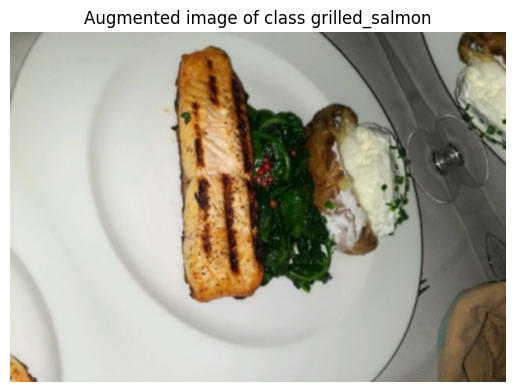

In [ ]:
# lets plot the random images from the training data

import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
path_10 = '10_food_classes_10_percent/train/'
class_name_10 = random.choice(train_data_10_p.class_names)
target_dir_10 = path_10 + class_name_10
list_of_images = os.listdir(target_dir_10)
random_image = random.choice(list_of_images)
tensor_image_10 = mpimg.imread(target_dir_10 + "/" + random_image)
image_10 = plt.imshow(tensor_image_10)
plt.title(f"{class_name_10}")
plt.axis("off")

# plotting augmented image
augmented_image_10 = data_augmentation_10(tf.expand_dims(tensor_image_10, axis = 0))
plt.figure() # for new figure
plt.imshow(tf.squeeze(augmented_image_10)/255.)
plt.title(f"Augmented image of class {class_name_10}")
plt.axis("off")

In [ ]:
data_augmentation_10.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_2 (RandomFlip)  (None, None, None, 3)     0         
                                                                 
 random_width_2 (RandomWidt  (None, None, None, 3)     0         
 h)                                                              
                                                                 
 random_height_2 (RandomHei  (None, None, None, 3)     0         
 ght)                                                            
                                                                 
 random_rotation_1 (RandomR  (None, None, None, 3)     0         
 otation)                                                        
                                                                 
 random_zoom_1 (RandomZoom)  (None, None, None, 3)     0         
                                                        

In [ ]:
# create a base model
base_model_10 = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top = False)

base_model_10.trainable = False

inputs = tf.keras.layers.Input(shape = (224,224,3), name = "Input_layer_10")

x = data_augmentation_10(inputs) # augment our training images

x = base_model_10(x , training = False) # pass augmented images to the base model

x = tf.keras.layers.GlobalAveragePooling2D(name = "GAP2D")(x)

outputs = tf.keras.layers.Dense(10, activation = "softmax", name = "output_layer_10")(x)

# create our own model

model_10_percent = tf.keras.Model(inputs , outputs)

model_10_percent.compile(loss = "categorical_crossentropy",
                         optimizer = "Adam",
                         metrics = ["accuracy"])


In [ ]:
# creating Modelcheckpoint

checkpoint_path = "checkpoint_list/checkpoint"

checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                save_freq = "epoch",
                                                save_best_only = False,
                                                save_weights_only = False,
                                                verbose = 1)

In [ ]:
model_10_percent_history = model_10_percent.fit(train_data_10_p,
                                                epochs = 5,
                                                steps_per_epoch = len(train_data_10_p),
                                                validation_data = test_data_10_p,
                                                validation_steps = int(0.25 * len(test_data_10_p)),
                                                callbacks = [checkpoint])

Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0337 - accuracy: 0.3120
Epoch 1: saving model to checkpoint_list/checkpoint
24/24 [==============================] - 138s 5s/step - loss: 2.0337 - accuracy: 0.3120 - val_loss: 1.5733 - val_accuracy: 0.6234
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.4271 - accuracy: 0.6440
Epoch 2: saving model to checkpoint_list/checkpoint
24/24 [==============================] - 131s 6s/step - loss: 1.4271 - accuracy: 0.6440 - val_loss: 1.1202 - val_accuracy: 0.7401
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.1357 - accuracy: 0.7173
Epoch 3: saving model to checkpoint_list/checkpoint
24/24 [==============================] - 119s 5s/step - loss: 1.1357 - accuracy: 0.7173 - val_loss: 0.8885 - val_accuracy: 0.7747
Epoch 4/5
24/24 [==============================] - ETA: 0s - loss: 0.9709 - accuracy: 0.7427
Epoch 4: saving model to checkpoint_list/checkpoint
24/24 [=======================

In [ ]:
model_10_percent_history.history

{'loss': [2.0336501598358154,
  1.4270648956298828,
  1.1357377767562866,
  0.9708698987960815,
  0.8640479445457458],
 'accuracy': [0.31200000643730164,
  0.6439999938011169,
  0.7173333168029785,
  0.7426666617393494,
  0.7666666507720947],
 'val_loss': [1.5732877254486084,
  1.120198130607605,
  0.8884615898132324,
  0.8004214763641357,
  0.7015041708946228],
 'val_accuracy': [0.6233552694320679,
  0.7401315569877625,
  0.7746710777282715,
  0.7861841917037964,
  0.8026315569877625]}

In [ ]:
h = model_10_percent.layers
h

In [ ]:
model_10_percent_history.params

{'verbose': 1, 'epochs': 5, 'steps': 24}

In [ ]:
check = model_10_percent.load_weights(checkpoint_path)
check

In [ ]:
model_10_percent.evaluate(test_data_10_p)

79/79 [==============================] - 134s 2s/step - loss: 0.7035 - accuracy: 0.8108


[0.7035256624221802, 0.8108000159263611]

In [ ]:
import numpy as np
np.isclose(7,7)

True

In [ ]:
for layer_number , layer in enumerate(model_10_percent.layers):
  print(f"Layer number {layer_number} | {layer.name} | {layer}")

Layer number 0 | Input_layer_10 | <keras.src.engine.input_layer.InputLayer object at 0x7898d14bcb80>
Layer number 1 | sequential | <keras.src.engine.sequential.Sequential object at 0x7898d8c1f280>
Layer number 2 | efficientnetv2-b0 | <keras.src.engine.functional.Functional object at 0x7898d0ee1ed0>
Layer number 3 | GAP2D | <keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7898d0dfd1b0>
Layer number 4 | output_layer_10 | <keras.src.layers.core.dense.Dense object at 0x7898d0ee0880>


In [ ]:
# so layer number 2 is  efficientnetv2-b0
# how many layers are trainable in our base_model
len(base_model_10.trainable_variables)

0

In [ ]:
base_model_layers = model_10_percent.layers[2]
base_model_layers.name

'efficientnetv2-b0'

In [ ]:
len(base_model_layers.layers)

270

In [ ]:
len(base_model_layers.layers[:-10])

260

In [ ]:
for layer_number , layer in enumerate(base_model_layers.layers):
  print(f"{layer.name} : {layer.trainable}")

input_5 : False
rescaling_4 : False
normalization_4 : False
stem_conv : False
stem_bn : False
stem_activation : False
block1a_project_conv : False
block1a_project_bn : False
block1a_project_activation : False
block2a_expand_conv : False
block2a_expand_bn : False
block2a_expand_activation : False
block2a_project_conv : False
block2a_project_bn : False
block2b_expand_conv : False
block2b_expand_bn : False
block2b_expand_activation : False
block2b_project_conv : False
block2b_project_bn : False
block2b_drop : False
block2b_add : False
block3a_expand_conv : False
block3a_expand_bn : False
block3a_expand_activation : False
block3a_project_conv : False
block3a_project_bn : False
block3b_expand_conv : False
block3b_expand_bn : False
block3b_expand_activation : False
block3b_project_conv : False
block3b_project_bn : False
block3b_drop : False
block3b_add : False
block4a_expand_conv : False
block4a_expand_bn : False
block4a_expand_activation : False
block4a_dwconv2 : False
block4a_bn : False
bl

In [ ]:
# we can check layer by layer if any layer is trainable
for layer_number , layer in enumerate(model_)

In [ ]:
# # Create a functional model with data augmentation
# import tensorflow as tf
# from tensorflow.keras import layers
# from tensorflow.keras.models import Sequential
# # from tensorflow.keras.layers.experimental import preprocessing # OLD

# # NEW: Newer versions of TensorFlow (2.10+) can use the tensorflow.keras.layers API directly for data augmentation
# data_augmentation = keras.Sequential([
#   layers.RandomFlip("horizontal"),
#   layers.RandomRotation(0.2),
#   layers.RandomZoom(0.2),
#   layers.RandomHeight(0.2),
#   layers.RandomWidth(0.2),
#   # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNet
# ], name ="data_augmentation")

# ## OLD
# # # Build data augmentation layer
# # data_augmentation = Sequential([
# #   preprocessing.RandomFlip('horizontal'),
# #   preprocessing.RandomHeight(0.2),
# #   preprocessing.RandomWidth(0.2),
# #   preprocessing.RandomZoom(0.2),
# #   preprocessing.RandomRotation(0.2),
# #   # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNet
# # ], name="data_augmentation")

# # Setup the input shape to our model
# input_shape = (224, 224, 3)

# # Create a frozen base model
# # base_model = tf.keras.applications.EfficientNetB0(include_top=False)
# base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
# base_model.trainable = False

# # Create input and output layers
# inputs = layers.Input(shape=input_shape, name="input_layer") # create input layer
# x = data_augmentation(inputs) # augment our training images
# x = base_model(x, training=False) # pass augmented images to base model but keep it in inference mode, so batchnorm layers don't get updated: https://keras.io/guides/transfer_learning/#build-a-model
# x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
# outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)
# model_2 = tf.keras.Model(inputs, outputs)

# # Compile
# model_2.compile(loss="categorical_crossentropy",
#               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # use Adam optimizer with base learning rate
#               metrics=["accuracy"])